# Ciencia de datos con R: Fundamentos Estadísticos
## Seminario Elemental de Estadística con R

### Entrega 2
> #### Alumno: Leandro Carreira
>
> #### LU: 669/18

# Éxitos y Fracasos

A lo largo de esta actividad identificaremos el **éxito** con el valor $1$ y el **fracaso** con el valor $0$.

# 6. Sigue tirando, sigue tirando 🐭🎸

## a)

> Implementar la función `perseverancia_exito` que emule el número de repeticiones necesarias **hasta** observar el primer éxito.
>  
>  Indicar si es necesario definir un input para esta función.

### Solución 6a

**Nota:** Defino la función `exito_fracaso` del **punto 4.** para llamar desde `perseverancia_exito` y quede explícito qué hace la función.

Para esta función es necesario el parámetro `p` que determina la **probabilidad de éxito/fracaso**.

In [602]:
exito_fracaso <- function(p){
    # Devuelve 1 con probabilidad p; 0 con (1-p)
    resul <- if(runif(n=1) < p) 1 else 0
    return(resul)
}

In [603]:
perseverancia_exito <- function(p){
    # Comienzo por 1 por si es exito en la primera
    reps = 1
    while(exito_fracaso(p) != 1){
        reps = reps + 1
    }
    return(reps)
}

## b)

> Guardar en el vector `muchas_perseverancia_exito` el resultado de la función `perseverancia_exito` a lo largo de `Nrep = 1000` repeticiones.
>
>Calcular la **frecuencia relativa** de cada uno de los valores obtenidos.
>
>Calcular el **promedio** de los resultados guardados en `muchas_perseverancia_exito`.

### Solución 6b

In [604]:
# Defino funcion para llamar en 6c.
muchos_experimento_b <- function(Nrep, p){
    muchas_perseverancia_exito <- rep(NA, Nrep)
    # Repito Nrep veces el experimento y los guardo 
    # en el vector ya definido arriba
    for(i in 1:Nrep){
        muchas_perseverancia_exito[i] <- perseverancia_exito(p)
    }
    return(muchas_perseverancia_exito)
}

In [605]:
Nrep=1000
muchas_perseverancia_exito <- muchos_experimento_b(Nrep=Nrep, p=0.8)
# Cuento ocurrencias por valor
ocurrencias <- table(muchas_perseverancia_exito)
# Frecuencia relativa
frecuencia <- ocurrencias/Nrep
frecuencia

muchas_perseverancia_exito
    1     2     3     4     5 
0.794 0.157 0.038 0.010 0.001 

In [606]:
# Promedio de repeticiones necesarias para el primer exito
promedio <- mean(muchas_perseverancia_exito)
promedio

[1] 1.267

## c)
> Repita el ítem anterior variando `p` en la grilla `grilla <- seq(0.01, 0.99, by=0.02)` y graficar `p` (en la grilla) vs el promedio de `perseverancia_exito(p)` en `Nrep = 1000`.
>
> Proponga alguna **curva** para **modelar este fenómeno** y superponerla en otro color.

### Solución 6c

In [607]:
# Grilla de valores para p
grilla <- seq(0.01, 0.99, by=0.02)

In [608]:
# Llamo a experimento.b para cada p en grilla
Nrep <- 1000
m    <- length(grilla)
grilla_de_promedios <- rep(NA, m)
for(i in 1:m){
    muchas_perseverancias  <- muchos_experimento_b(Nrep=Nrep, p=grilla[i])
    grilla_de_promedios[i] <- mean(muchas_perseverancias)
}

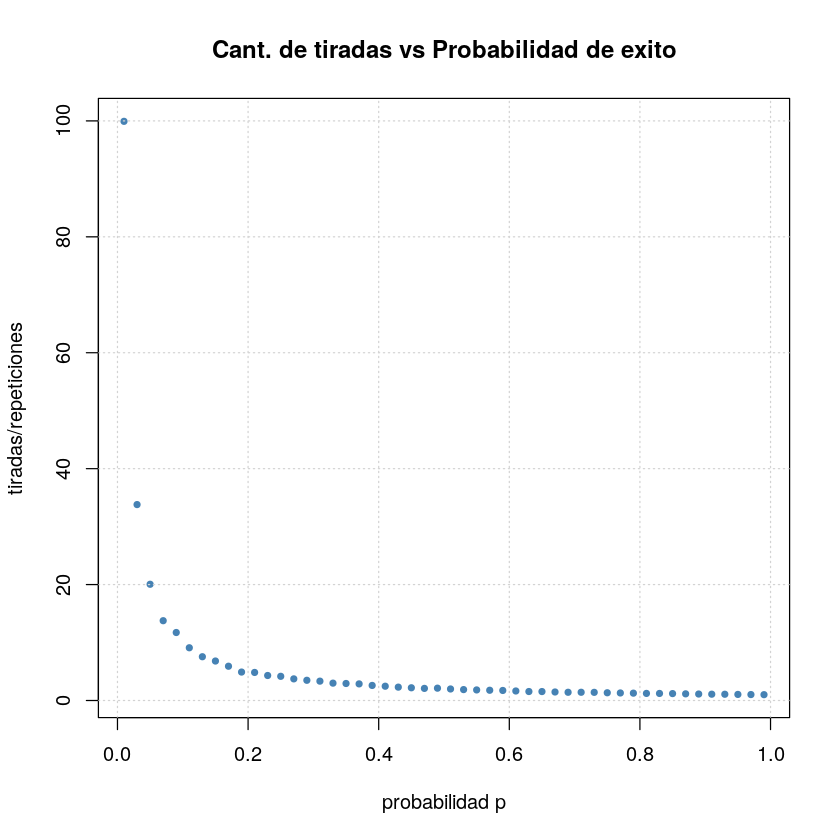

In [609]:
plot(grilla, grilla_de_promedios,
     main="Cant. de tiradas vs Probabilidad de exito",
     xlab="probabilidad p", ylab="tiradas/repeticiones",
     col='steelblue', pch=20)
grid()

Propongo una curva con decaimiento exponencial variando el parámetro del exponente para acercarme lo más posible a los resultados obtenidos, y similarmente el area positiva de una hiperbola.

Para ello, defino una función `exponencial_estimada` e `hiperbola_estimada`

In [610]:
exponencial_estimada <- function(x, e, a, m){
    # Devuelve un valor o vector de valores para cada x
    # Notar que e es una variable, no la constante e
    return( a * e^( - m * x ) )
}

In [611]:
hiperbola_estimada <- function(x, a=1, m=1){
    # Devuelve un valor o vector de valores para cada x
    return( a * 1 / (x^m) )
}

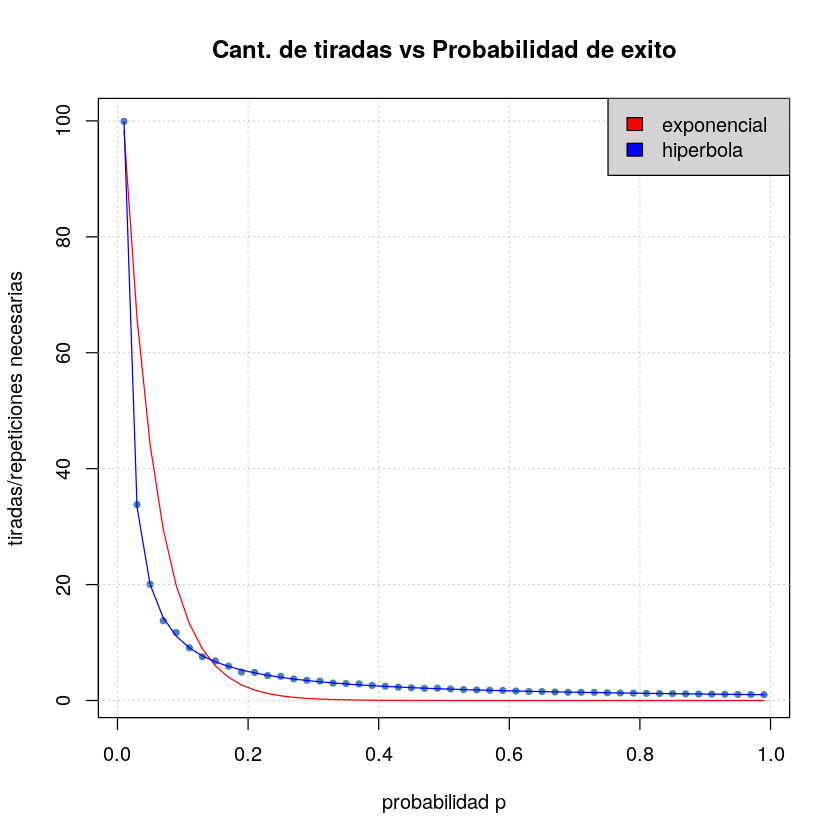

In [612]:
plot(grilla, grilla_de_promedios,
     main="Cant. de tiradas vs Probabilidad de exito",
     xlab="probabilidad p", ylab="tiradas/repeticiones necesarias",
     col='steelblue', pch=20)
grid()
lines(grilla, exponencial_estimada(grilla, e=exp(1), a=120, m=20), col='red')
lines(grilla, hiperbola_estimada(grilla, a=1, m=1), col='blue')
legend("topright", legend=c("exponencial", "hiperbola"), fill=c("red", "blue"), bg="lightgrey")

Claramente la hipérbola (en azul) se lleva el primer puesto.

# Bonus: Sobre ajustar la curva

![acompaname.jpg](https://i.imgur.com/0a5qk4l.jpg)

Después de **mucho** tiempo intentando ajustar la curva **exponencial** a los datos, no pude encontrar parámetros que se acomoden bien.

Hasta hice una grilla **por cada parámetro** y automaticé la búsqueda de la **mejor distancia cuadrática media** (código abajo).

Fue un fracaso.

Decidí modificar la distribución de la grilla de probabilidadas, para obtener datos "mejor" distribuidos a lo que esperaba: 

In [626]:
# Defino función logseq con pasos logaritmicos
logseq <- function(from, to, length.out) {
  exp(seq(log(from), log(to), length.out=length.out))
}
grilla_log = logseq(from=0.0001, to=1, length.out=50)

Obteniendo así el siguiente gráfico:

In [627]:
Nrep <- 1000
m    <- length(grilla_log)
grilla_log_de_promedios <- rep(NA, m)
for(i in 1:m){
    muchas_perseverancias  <- muchos_experimento_b(Nrep=Nrep, p=grilla_log[i])
    grilla_log_de_promedios[i] <- mean(muchas_perseverancias)
}

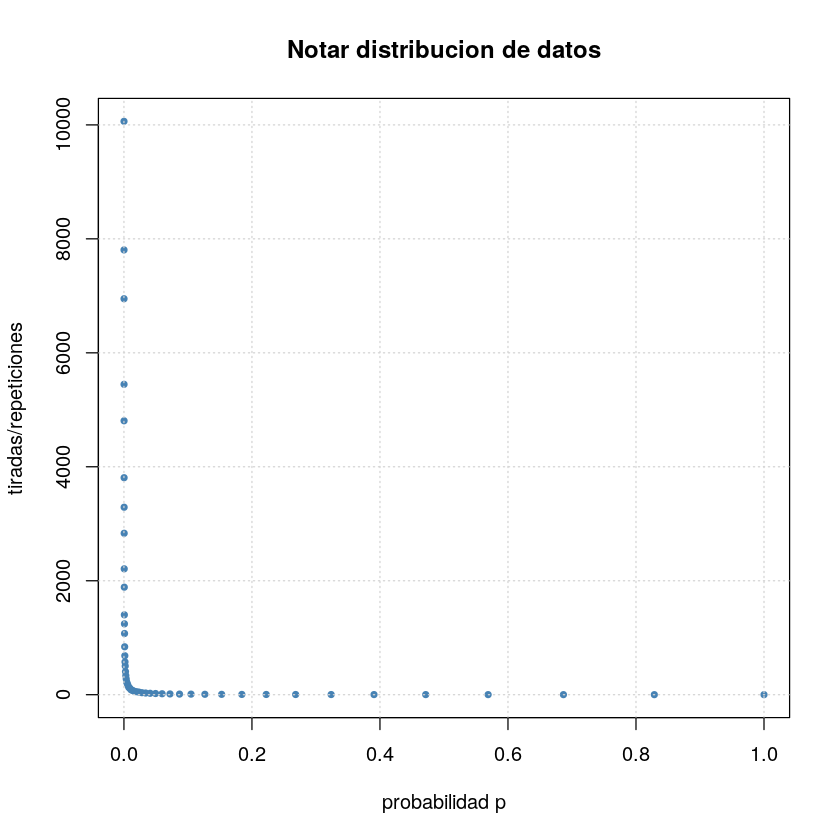

In [628]:
plot(grilla_log, grilla_log_de_promedios,
     main="Notar distribucion de datos",
     xlab="probabilidad p", ylab="tiradas/repeticiones",
     col='steelblue', pch=20)
grid()

***"Qué parecida que es a una hipérbola!... capaz también se acerque un poco!"***

Y en **ese** momento definí la funcion hipérbola con valores `a` y `m` por defecto de 1, y a la primera:

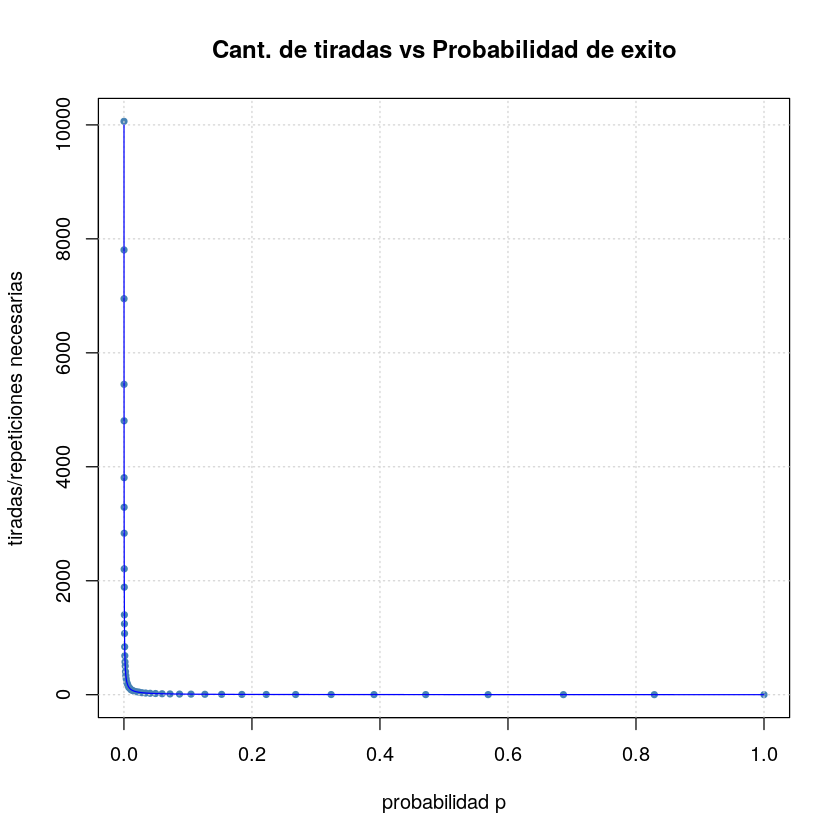

In [629]:
plot(grilla_log, grilla_log_de_promedios,
     main="Cant. de tiradas vs Probabilidad de exito",
     xlab="probabilidad p", ylab="tiradas/repeticiones necesarias",
     col='steelblue', pch=20)
grid()

lines(grilla_log, hiperbola_estimada(grilla_log, a=1, m=1), col='blue')

Y con la grilla de p lineal:

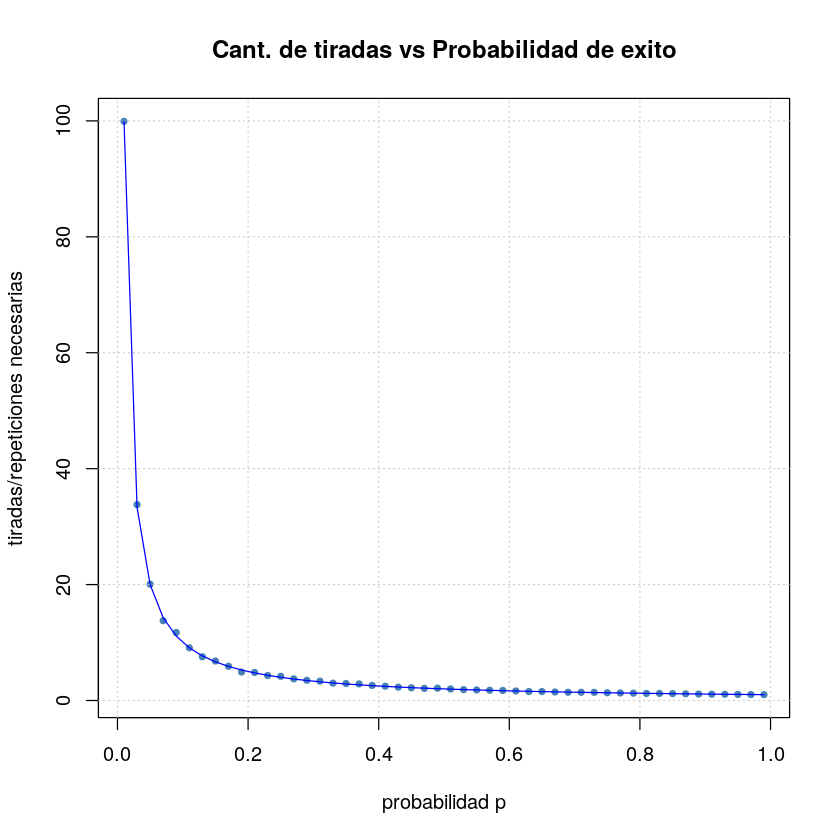

In [630]:
plot(grilla, grilla_de_promedios,
     main="Cant. de tiradas vs Probabilidad de exito",
     xlab="probabilidad p", ylab="tiradas/repeticiones necesarias",
     col='steelblue', pch=20)
grid()

lines(grilla, hiperbola_estimada(grilla, a=1, m=1), col='blue')

Y en ese preciso momento me acordé que la esperanza de una variable aleatoria exponencial es $\frac{1}{\lambda}$, o sea que su probabilidad p, para cada p, es $\approx \frac{1}{promedio}$.

![fin.jpg](https://i.imgur.com/HCNXBcg.jpg)

$$\large fin$$

## Innecesaria busqueda de hiperparametros

In [631]:
grilla_e <- seq(1, 3, by=0.1)
grilla_a <- seq(100, 400, by=1)
grilla_m <- seq(1,  500,  by=1)

In [632]:
distancia_l2 <- function(y, h){
    # Suma de la diferencia en y al cuadrado
    return(sum((y-h)^2))
}

In [633]:
i <- 1
#distancias <- rep(NA, length(grilla_a)*length(grilla_a))
min_distancia <- 9999
for(e in grilla_e){
    for(a in grilla_a){
        for(m in grilla_m){
            curva_estimada <- exponencial_estimada(x=grilla, e=e, a=a, m=m)
            distancia      <- distancia_l2(grilla_de_promedios, curva_estimada)
            if(distancia < min_distancia){
                min_distancia <- distancia
                best_e <- e
                best_a <- a
                best_m <- m
            }
            i <- i+1
        }
    }
}

In [634]:
best_e

[1] 1.7

In [635]:
best_a

[1] 145

In [636]:
best_m

[1] 76

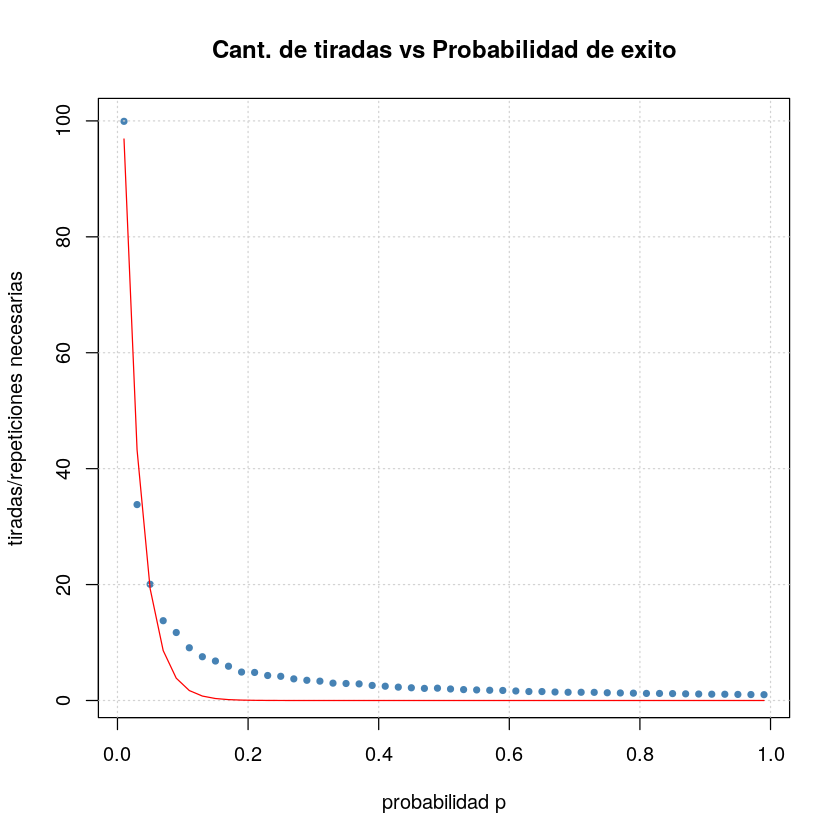

In [638]:
plot(grilla, grilla_de_promedios,
     main="Cant. de tiradas vs Probabilidad de exito",
     xlab="probabilidad p", ylab="tiradas/repeticiones necesarias",
     col='steelblue', pch=20)
grid()
grilla_x <- seq(0, 3, 0.01)
lines(grilla, exponencial_estimada(grilla, e=best_e, a=best_a, m=best_m), col='red')